**Whale Tail Recognition Project.**


This project aims to provide marine biology researchers a cheap and easy solution to recognize individual whales using a simple camera so that they can track their movement throught the ocean.

Below you will find the paper me and my fellow classmates wrote as well as the code used to train the deep learning model used to recognize individual whales.

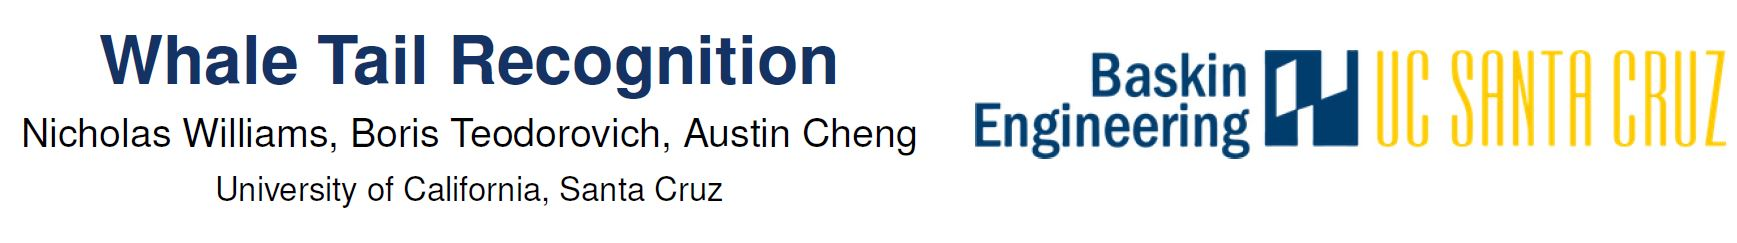

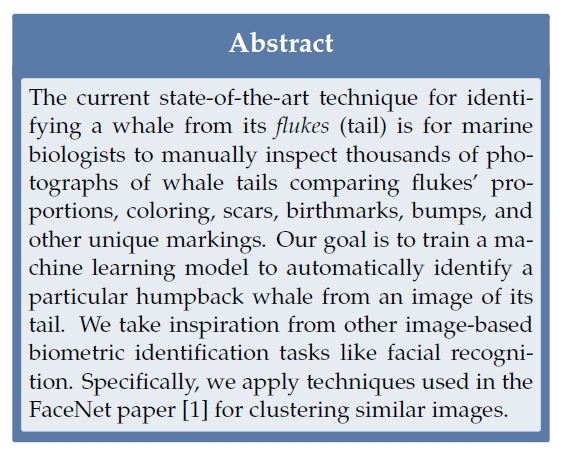

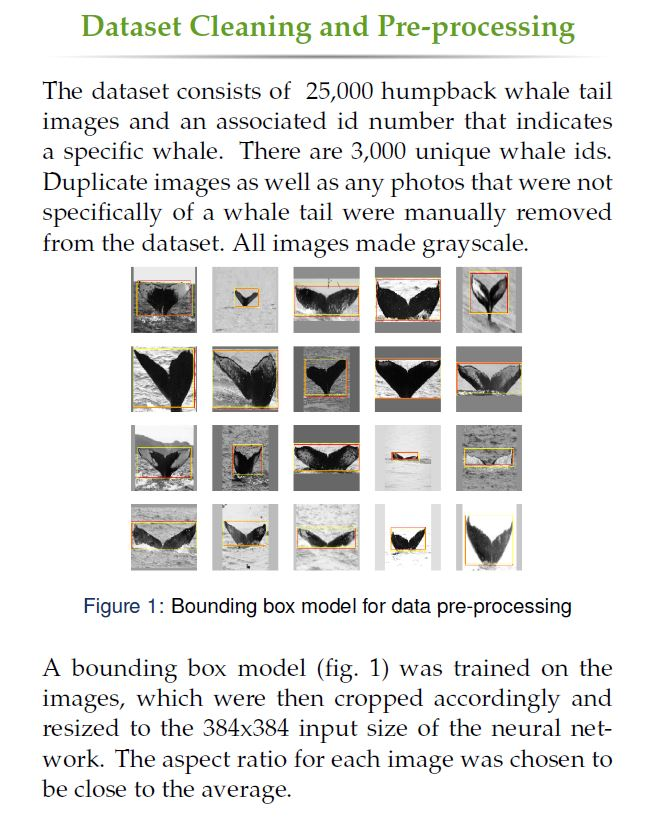

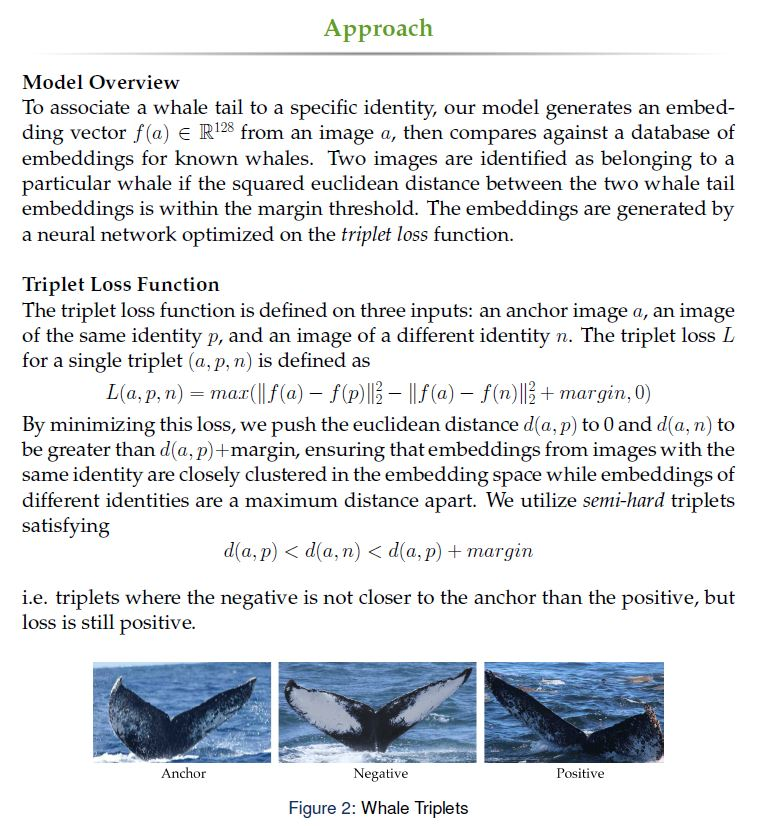

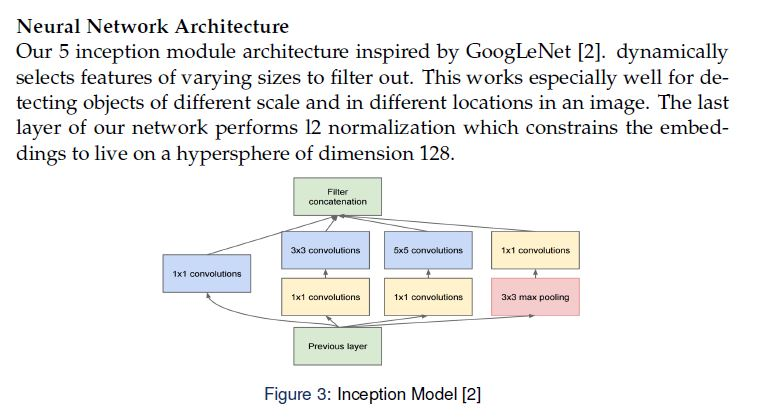

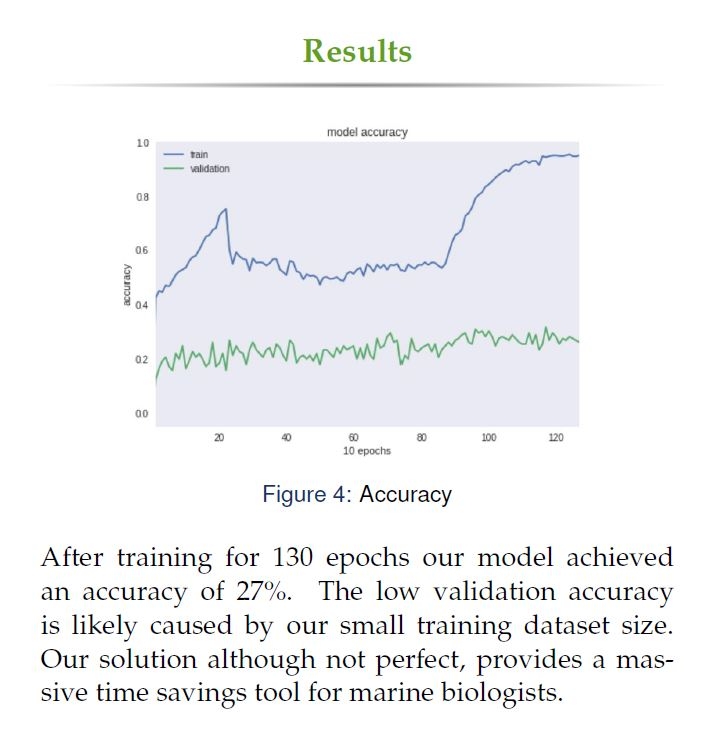

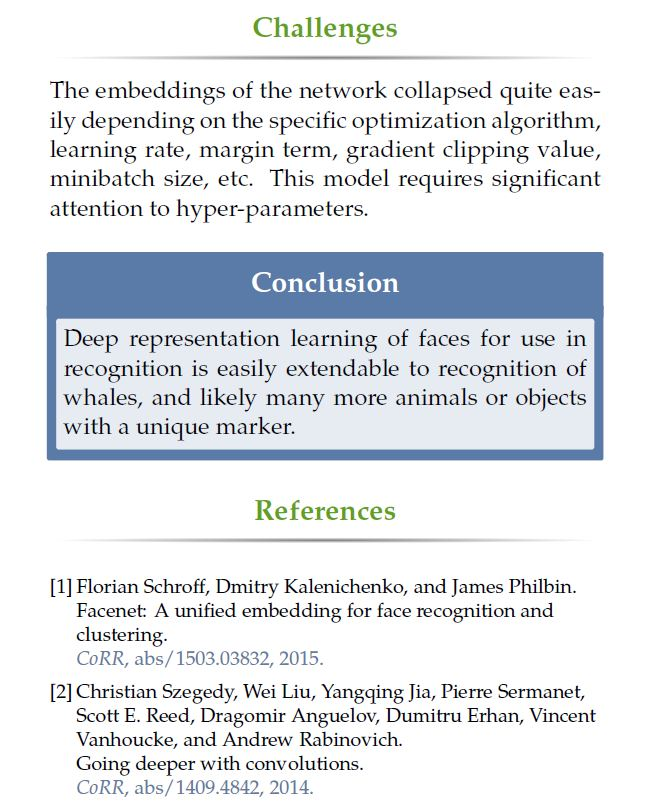

**Training Code**

model loaded
Found 1882 images belonging to 341 classes.
Found 144 images belonging to 86 classes.
getting validation images
validation images loaded
getting training images
training images loaded
epoch 1 out of 5
Epoch 1/10
 - 63s - loss: 0.0045 - val_loss: 0.4440
Epoch 2/10
 - 60s - loss: 0.0028 - val_loss: 0.4412
Epoch 3/10
 - 59s - loss: 0.0029 - val_loss: 0.4456
Epoch 4/10
 - 59s - loss: 0.0024 - val_loss: 0.4429
Epoch 5/10
 - 60s - loss: 0.0020 - val_loss: 0.4419
Epoch 6/10
 - 60s - loss: 0.0017 - val_loss: 0.4453
Epoch 7/10
 - 59s - loss: 0.0011 - val_loss: 0.4419
Epoch 8/10
 - 59s - loss: 0.0010 - val_loss: 0.4411
Epoch 9/10
 - 60s - loss: 8.4809e-04 - val_loss: 0.4468
Epoch 10/10
 - 59s - loss: 5.2746e-04 - val_loss: 0.4433
the training accuracy is : 0.9537725823591924
the validation accuracy is : 0.1597222222222222
epoch 2 out of 5
Epoch 1/10
 - 59s - loss: 4.3071e-04 - val_loss: 0.4422
Epoch 2/10
 - 59s - loss: 4.3224e-04 - val_loss: 0.4406
Epoch 3/10
 - 58s - loss: 3.2051e-

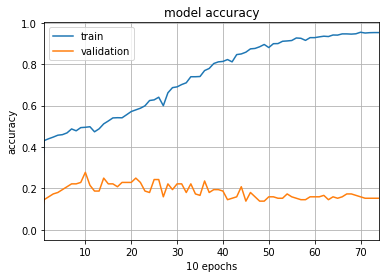

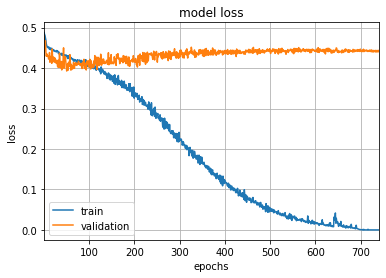

Model architecture and weights saved into a .h5 file


In [ ]:
import tensorflow as tf
import keras as K
from keras.layers import Input
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.models import Model
from keras.utils import plot_model
from keras.models import load_model
import matplotlib.pyplot as plt

from keras import backend as backend

import itertools
import cv2 as cv2
import numpy as np

from keras.models import load_model
from keras.preprocessing import image as Image
from keras import optimizers

import os
import pandas as pd
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator

input_img = Input(shape = (384, 384,1)) 


#input_img = K.layers.core.Reshape((384, 384, 3))(input_img)

#apply a few convolutions to reduce size
layer_1=Conv2D(1, (3,3), strides=2, activation='relu')(input_img)
layer_1=Conv2D(5, (3,3), activation='relu')(layer_1)

#apply a max pooling to reduce size again
layer_2=MaxPooling2D((3,3), strides=(2,2))(layer_1)


#inception block 1
tower_1 = Conv2D(16, (1,1), padding='same', activation='relu')(layer_2)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(16, (1,1), padding='same', activation='relu')(layer_2)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_2)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

tower_4 = Conv2D(1,(1,1),activation='relu', padding='same')(layer_2)

#concatenate all the volumes
inception_block_1= K.layers.concatenate([tower_1, tower_2, tower_3, tower_4], axis = 3)


#inception block 2
tower_1 = Conv2D(10, (1,1), padding='same', activation='relu')(inception_block_1)
tower_1 = Conv2D(30, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(10, (1,1), padding='same', activation='relu')(inception_block_1)
tower_2 = Conv2D(30, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(inception_block_1)
tower_3 = Conv2D(30, (1,1), padding='same', activation='relu')(tower_3)

tower_4 = Conv2D(1,(1,1),activation='relu', padding='same')(inception_block_1)

#concatenate all the volumes
inception_block_2= K.layers.concatenate([tower_1, tower_2, tower_3, tower_4], axis = 3)


#inception block 3
tower_1 = Conv2D(10, (1,1), padding='same', activation='relu')(inception_block_2)
tower_1 = Conv2D(30, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(10, (1,1), padding='same', activation='relu')(inception_block_2)
tower_2 = Conv2D(30, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(inception_block_2)
tower_3 = Conv2D(30, (1,1), padding='same', activation='relu')(tower_3)

tower_4 = Conv2D(1,(1,1),activation='relu', padding='same')(inception_block_2)

#concatenate all the volumes
inception_block_3= K.layers.concatenate([tower_1, tower_2, tower_3, tower_4], axis = 3)

#inception block 4
tower_1 = Conv2D(10, (1,1), padding='same', activation='relu')(inception_block_3)
tower_1 = Conv2D(30, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(10, (1,1), padding='same', activation='relu')(inception_block_3)
tower_2 = Conv2D(30, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(inception_block_3)
tower_3 = Conv2D(30, (1,1), padding='same', activation='relu')(tower_3)

tower_4 = Conv2D(1,(1,1),activation='relu', padding='same')(inception_block_3)

#concatenate all the volumes
inception_block_4= K.layers.concatenate([tower_1, tower_2, tower_3, tower_4], axis = 3)


#inception block 5
tower_1 = Conv2D(10, (1,1), padding='same', activation='relu')(inception_block_4)
tower_1 = Conv2D(30, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(10, (1,1), padding='same', activation='relu')(inception_block_4)
tower_2 = Conv2D(30, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(inception_block_4)
tower_3 = Conv2D(30, (1,1), padding='same', activation='relu')(tower_3)

tower_4 = Conv2D(1,(1,1),activation='relu', padding='same')(inception_block_4)

#concatenate all the volumes
inception_block_5= K.layers.concatenate([tower_1, tower_2, tower_3, tower_4], axis = 3)


depth_reduction=Conv2D(1, (1,1), padding='same', activation='relu')(inception_block_5)

area_reduction=Conv2D(1, (7,7), activation='relu')(depth_reduction)



reduction_layer=area_reduction


#Laat layer
embedding_output = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(reduction_layer)
embedding_output = Flatten()(embedding_output)
embedding_output = Dense(128)(embedding_output)
embedding_output = Lambda(lambda  x: tf.keras.backend.l2_normalize(x,axis=1))(embedding_output) #L2 Normalization


    #Tensorflow Triplet Loss.
def myloss(ytrue,ypredict): 
  #Convert the one hot encoded labels back into numeric labels.
  ytrue=tf.argmax(ytrue, axis=1)
  #return batch_hard_triplet_loss(ytrue,ypredict)
  return tf.contrib.losses.metric_learning.triplet_semihard_loss(ytrue, ypredict,0.5)

        #Useful Functions that were tested, but don't work with tensorflow yet.
#KNN prediction function.
#Inputs: 'test_embeddings' == a tensor of floats of size (n, 128), 
#        where n is the number of whales to predict in the test set.
#        'training_embeddings' == a tensor of floats of size (m, 128), 
#        where m is the number of of instances in the training set.
#        'training_labels' == a tensor of integers of size (m) consting of 
#        the labels for all instances in the training set.
#        'K' == the number of neighbors.
#
#Outputs: A tensor of integers of size (n) constisting of predicted class labels.
#
def predict_whale_label(test_embeddings, training_embeddings, training_labels, K=4):
  from sklearn.preprocessing import StandardScaler
  from sklearn.neighbors import KNeighborsClassifier
  
  classifier = KNeighborsClassifier(n_neighbors=K, weights='uniform', algorithm='brute', p=2, n_jobs=-1)  
  classifier.fit(training_embeddings, training_labels) 
  y_pred = classifier.predict(test_embeddings)  
  return y_pred

#This function computes the accuracy, either training or test.
#Inputs: 'test_embeddings' == a tensor of floats of size (n, 128), 
#        where n is the number of whales to predict in the test set.
#        'training_embeddings' == a tensor of floats of size (m, 128), 
#        where m is the number of of instances in the training set.
#        'training_labels' == a tensor of integers of size (m) consting of 
#        the labels for all instances in the training set.
#        'K' == the number of neighbors.
#
#Outputs: Returns the scalar accuracy. This can be either the training accuracy or
#         the validation accuracy. If you want to get training accuracy just
#         pass in test_embeddings==training_embeddings, and
#         test_labels==training_labels.
def whale_accuracy(test_embeddings, training_embeddings, training_labels, test_labels, K=4):
  whale_predictions=predict_whale_label(test_embeddings, training_embeddings, training_labels, K)
  return accuracy_score(test_labels, whale_predictions)


    #Custom metric for training accuracy.
#Inputs: 'ytrue' == a tensor of the one hot encoded categorical labels,
#         it has size (num_whale_ids, number of instances)
#        'ypred' == a tensor of size (number of isntances, 128), it contains
#        the embeddings fo all the instances keras uses it for.
def training_acc(ytrue, ypred):
  #Convert the one hot encoded labels back into numeric labels.
  #ytrue=tf.argmax(ytrue, axis=1)
  #accuracy=whale_accuracy(ypred, ypred, ytrue, ytrue, K=4)
  return accuracy

  return tf.constant([0.88]) #A dummy value

#This code loads in all the images from a folder specified by dirname
#into a numpy array of size (numimages,384,384).
#The images are made grayscale, rescaled to (384,384,1), 
#and pixels scaled to be between 0-1.
#It also returns all of the nunmerically mapped whale ids for those images.
#Inputs: filepath == the main folder with the whales in it
#Outputs: a tuple with the first element being
#         a numpy array of images of size (#images, 384, 384, 1),
#         and the second element being an array of ints of
#         the numeric whale IDs of those images.
def getImagesandIDs(filepath):
  def getListOfFiles(dirName):
      # create a list of file and sub directories 
      # names in the given directory 
      listOfFile = os.listdir(dirName)
      allFiles = list()
      # Iterate over all the entries
      for entry in listOfFile:
          # Create full path
          fullPath = os.path.join(dirName, entry)
          # If entry is a directory then get the list of files in this directory 
          if os.path.isdir(fullPath):
              allFiles = allFiles + getListOfFiles(fullPath)
          else:
              allFiles.append(fullPath)

      return allFiles

  # Get the list of all files in directory tree at given path
  listOfFileswithDirectories = getListOfFiles(filepath)

  #Get the filenames.
  filenamesonly=[]
  for i in range(len(listOfFileswithDirectories)):
    s=listOfFileswithDirectories[i]
    s=s[-12:]
    filenamesonly.append(s)
  
  #Turn the filenames into numeric whale IDs.
  numericIDs=[]
  df = pd.read_csv("/content/gdrive/My Drive/Whale Cropped Train Valid and Test/trainwithnumericwhaleids.csv")
  for imagename in range(len(filenamesonly)):
    name=filenamesonly[imagename]
    wow=df.loc[df['Image'] == name]
    theid=wow['numericID']
    val=theid.values[0]
    numericIDs.append(val)


  #Load in all the images into a list.
  val_images=[]
  # Print the files with directories
  for elem in listOfFileswithDirectories:
    img = cv2.imread(elem,0)
    dim = (384, 384)
    # resize the image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img=img*(1.0/255)
    img = np.reshape(img, (384, 384, 1))
    val_images.append(img)

  #Turn the list of images into a numpy array.
  val_images=np.asarray(val_images)
  
  return (val_images, numericIDs)

'''
  #Set up the model
model = Model(inputs = input_img, outputs = embedding_output)
print(model.summary())
plot_model(model, to_file='model.png', show_shapes='true')
sgd = optimizers.SGD(lr=0.005 , clipvalue=0.05)
# model.compile(loss=myloss, optimizer=sgd, metrics=[training_acc])
model.compile(loss=myloss, optimizer=sgd)
'''


#Load a pre-trained model architecture and weights if you want to.
model = load_model('/content/gdrive/My Drive/Whale Cropped Train Valid and Test/NoRotationFolder/CroppedandCleanedWhaleModelNoRotation.h5', custom_objects={"tf": tf, "myloss": myloss})
print("model loaded")
   
   
  #Make data generators

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=0)

validation_datagen= ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(
      directory= "/content/gdrive/My Drive/Whale Cropped Train Valid and Test/Cropped and Cleaned FourOrMoreImagesPerId/FourOrMoreImagesPerFolderCleanedDataCroppedFoldersOnly" ,
      target_size=(384, 384),
      color_mode='grayscale',
      classes=None,
      class_mode='categorical', #This causes labels to one-hot-encoded, which
      #will need to be changed later in the loss function.
      batch_size=93, #change to 120 later
      shuffle=False, #We want the whales looked at to be ordered.
      interpolation='nearest')

validation_generator=train_datagen.flow_from_directory(
      directory= "/content/gdrive/My Drive/Whale Cropped Train Valid and Test/Cropped and Cleaned Validation Data" ,
      target_size=(384, 384),
      color_mode='grayscale',
      classes=None,
      class_mode='categorical', #This causes labels to one-hot-encoded.
      batch_size=50, #change to 150 lat#er
      shuffle=False, #We want the whales looked at to be ordered.
      interpolation='nearest')

    #Train

  #Load the training and validation images in, and get their labels.
  
    #Validation Data
print("getting validation images")
valfolderpath= "/content/gdrive/My Drive/Whale Cropped Train Valid and Test/Cropped and Cleaned Validation Data"
valdata=getImagesandIDs(valfolderpath)
valimages=valdata[0]
valnumIDs=valdata[1]
print("validation images loaded")

  #Training Data
print("getting training images")
trainfolderpath= "/content/gdrive/My Drive/Whale Cropped Train Valid and Test/Cropped and Cleaned FourOrMoreImagesPerId/FourOrMoreImagesPerFolderCleanedDataCroppedFoldersOnly"
traindata=getImagesandIDs(trainfolderpath)
trainimages=traindata[0]
trainnumIDs=traindata[1]
print("training images loaded")

train_acc=[]
val_acc=[]

train_loss=[]
val_loss=[]

num_epochs=5
for i in range(num_epochs):
  print("epoch "+str(i+1) + " out of " + str(num_epochs))
  #Train and update on 1 epoch
  history = model.fit_generator(
      train_generator, 
      validation_data=validation_generator,
      validation_steps=4,
      steps_per_epoch = 124,  # 1736 images = batch_size * steps_per_epoch== 14*124.
      epochs = 10, #This is arbitrary.
      verbose = 2, 
      workers=8)
  
  #Save the loss values.
  train_loss.extend(history.history['loss'])
  val_loss.extend(history.history['val_loss'])
  
  #Compute the validation and test accuracy
  
  train_embeddings=model.predict(trainimages)
  val_embeddings=model.predict(valimages)
  
  trainacc=whale_accuracy(train_embeddings, train_embeddings, trainnumIDs, trainnumIDs, K=3)
  print("the training accuracy is : "+str(trainacc))
  train_acc.append(trainacc)
  
  valacc=whale_accuracy(val_embeddings, train_embeddings, trainnumIDs, valnumIDs, K=3)
  print("the validation accuracy is : "+ str(valacc))
  val_acc.append(valacc)
  
      #Save all the model training values to files.
    
#Save the training accuracies
training_acc_values_file= open("/content/gdrive/My Drive/Whale Cropped Train Valid and Test/NoRotationFolder/CCWhaleTrainingAccValuesNoRotation.txt",'a',encoding = 'utf-8')
for i in range(len(train_acc)):
  training_acc_values_file.write(str(train_acc[i])+'\n')
training_acc_values_file.close()

#Save the validation accuracies
val_acc_values_file= open("/content/gdrive/My Drive/Whale Cropped Train Valid and Test/NoRotationFolder/CCWhaleValidationAccValuesNoRotation.txt",'a',encoding = 'utf-8')
for i in range(len(val_acc)):
  val_acc_values_file.write(str(val_acc[i])+'\n')
val_acc_values_file.close()

#Save the training loss
training_loss_values_file= open("/content/gdrive/My Drive/Whale Cropped Train Valid and Test/NoRotationFolder/CCWhaleTrainingLossValuesNoRotation.txt",'a',encoding = 'utf-8')
for i in range(len(train_loss)):
  training_loss_values_file.write(str(train_loss[i])+'\n')
training_loss_values_file.close()

#Save the validation loss
val_loss_values_file= open("/content/gdrive/My Drive/Whale Cropped Train Valid and Test/NoRotationFolder/CCWhaleValidationLossValuesNoRotation.txt",'a',encoding = 'utf-8')
for i in range(len(val_loss)):
  val_loss_values_file.write(str(val_loss[i])+'\n')
val_loss_values_file.close()
  
  
      #Read in all the past and current values from those files
    
train_acc_array=[]
with open("/content/gdrive/My Drive/Whale Cropped Train Valid and Test/NoRotationFolder/CCWhaleTrainingAccValuesNoRotation.txt", "r") as ins:
    for line in ins:
        train_acc_array.append(float(line.rstrip('\n')))
        
val_acc_array=[]
with open("/content/gdrive/My Drive/Whale Cropped Train Valid and Test/NoRotationFolder/CCWhaleValidationAccValuesNoRotation.txt", "r") as ins:
    for line in ins:
        val_acc_array.append(float(line.rstrip('\n')))
        
train_loss_array=[]
with open("/content/gdrive/My Drive/Whale Cropped Train Valid and Test/NoRotationFolder/CCWhaleTrainingLossValuesNoRotation.txt", "r") as ins:
    for line in ins:
        train_loss_array.append(float(line.rstrip('\n')))
        
val_loss_array=[]
with open("/content/gdrive/My Drive/Whale Cropped Train Valid and Test/NoRotationFolder/CCWhaleValidationLossValuesNoRotation.txt", "r") as ins:
    for line in ins:
        val_loss_array.append(float(line.rstrip('\n')))

  

    #Plot accuracy, and save the plot image.

#these are dummy values to make the plot look cleaner.
train_acc_array.insert(0,0)
val_acc_array.insert(0,0)

plt.plot(train_acc_array)
plt.plot(val_acc_array)
plt.xlim(1,len(train_acc_array)-1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('10 epochs')
plt.grid()
plt.legend(['train', 'validation'], loc='best')
plt.savefig('Accuracy.png')
plt.show()

    #Plot loss, and save the plot image.

#these are dummy values to make the plot look cleaner.
train_loss_array.insert(0,0)
val_loss_array.insert(0,0)

plt.plot(train_loss_array)
plt.plot(val_loss_array)
plt.xlim(1,len(train_loss_array)-1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.grid()
plt.legend(['train', 'validation'], loc='best')
plt.savefig('/content/gdrive/My Drive/Whale Cropped Train Valid and Test/NoRotationFolder/CroppedandCleanedWhaleModelNoRotationLoss.png')
plt.show()



    #Save the model.
model.save('/content/gdrive/My Drive/Whale Cropped Train Valid and Test/NoRotationFolder/CroppedandCleanedWhaleModelNoRotation.h5')  # creates a HDF5 file 'my_model.h5'
print("Model architecture and weights saved into a .h5 file")



**Note:** This is the same code that the paper uses, however the graphs in the training code above correspond to a recent experiment ran where the model was trained on much smaller number of epochs.

In [ ]:
!nvidia-smi

Mon Nov 18 20:57:08 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  